Data exploration script. The idea is to put all vairables into columns in a dataframe and then explore relations between all of them. From this script we will pick the relevant features to predict the price of bitcoin.
Some Possible explanatory variables:
- lagged Moving Averages (3, 5, 20, 50, 100, 200)
- Ethereum price 
- Fear and Greed Index
- Google search volume
- S & P price
- Range between high and low of the day

In [1]:
import yfinance as yf
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

%run helper_functions.ipynb

## Get Data and Features


In [2]:
hist = get_yfinance_data('BTC-USD')[['Close']].rename(columns = {'Close': 'Btc Close'}) # get btc hist
hist['Btc Close Return'] = hist['Btc Close'].pct_change() 
# get moving averages
windows = [3, 5, 10, 20, 50, 100, 200] # set moving average windows
for window in windows:
    hist['Lag ' + str(window)  + 'd Avg'] = moving_average(hist['Btc Close'], window=window, lag=1)

# get distance between moving averages and btc price
for col in hist.columns[1:]:
    hist['Btc Close' + ' - ' + str(col)] = hist['Btc Close'] - hist[col]

# get ether price
hist['Eth'] = get_yfinance_data('ETH-USD')['Close']

## Data Exploration
We start with a correlation heatmap to see which features show any promise in predicting bitcoin day to day return. Afterwards we graph some of the linear relationships

In [3]:
corr = hist.corr()  # correlation matrix
corr.style.background_gradient(cmap='coolwarm')  # heatmap for correlation matrix

,Btc Close,Btc Close Return,Lag 3d Avg,Lag 5d Avg,Lag 10d Avg,Lag 20d Avg,Lag 50d Avg,Lag 100d Avg,Lag 200d Avg,Btc Close - Btc Close Return,Btc Close - Lag 3d Avg,Btc Close - Lag 5d Avg,Btc Close - Lag 10d Avg,Btc Close - Lag 20d Avg,Btc Close - Lag 50d Avg,Btc Close - Lag 100d Avg,Btc Close - Lag 200d Avg,Eth
Btc Close,1.000000,0.070787,0.997014,0.995825,0.991938,0.983033,0.964262,0.918646,0.834940,1.000000,0.315434,0.379386,0.468938,0.547151,0.698147,0.778366,0.823083,0.847588
Btc Close Return,0.070787,1.000000,0.027668,0.027559,0.025487,0.020363,0.017920,0.007530,-0.007154,0.070781,0.535526,0.451136,0.338456,0.250448,0.177165,0.139357,0.120281,0.033263
Lag 3d Avg,0.997014,0.027668,1.000000,0.999451,0.996604,0.988631,0.969382,0.925241,0.842579,0.997014,0.241215,0.311347,0.414335,0.506512,0.674323,0.761026,0.809873,0.849346
Lag 5d Avg,0.995825,0.027559,0.999451,1.000000,0.998275,0.991143,0.971879,0.928450,0.846247,0.995826,0.233034,0.293347,0.393913,0.489052,0.663611,0.753205,0.803976,0.850435
Lag 10d Avg,0.991938,0.025487,0.996604,0.998275,1.000000,0.996142,0.977644,0.936152,0.855189,0.991938,0.219255,0.270217,0.353228,0.446649,0.635075,0.732071,0.787850,0.852598
Lag 20d Avg,0.983033,0.020363,0.988631,0.991143,0.996142,1.000000,0.987237,0.949556,0.870754,0.983033,0.205411,0.249356,0.314517,0.384331,0.579575,0.690462,0.756029,0.856278
Lag 50d Avg,0.964262,0.017920,0.969382,0.971879,0.977644,0.987237,1.000000,0.979692,0.911071,0.964262,0.206560,0.248648,0.305628,0.348908,0.483503,0.600330,0.681706,0.858489
Lag 100d Avg,0.918646,0.007530,0.925241,0.928450,0.936152,0.949556,0.979692,1.000000,0.963552,0.918646,0.176831,0.212469,0.259753,0.293171,0.389921,0.467005,0.549012,0.814813
Lag 200d Avg,0.834940,-0.007154,0.842579,0.846247,0.855189,0.870754,0.911071,0.963552,1.000000,0.834940,0.143214,0.172117,0.209973,0.235920,0.304676,0.343773,0.374674,0.714465
Btc Close - Btc Close Return,1.000000,0.070781,0.997014,0.995826,0.991938,0.983033,0.964262,0.918646,0.834940,1.000000,0.315431,0.379383,0.468936,0.547149,0.698146,0.778365,0.823083,0.847589


Text(0.5, 1.08, 'Btc Returns vs Moving Averages')

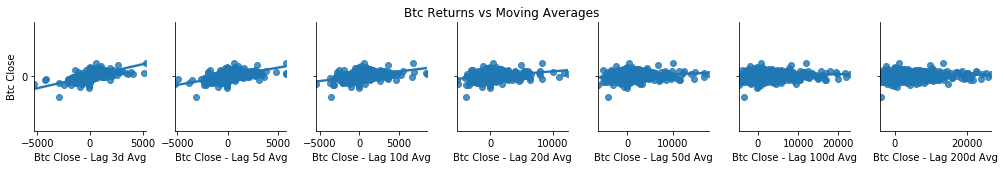

In [41]:
g = sns.PairGrid(hist, y_vars=["Btc Close Return"], x_vars=["Btc Close - Lag 3d Avg", "Btc Close - Lag 5d Avg",
                                                    "Btc Close - Lag 10d Avg", "Btc Close - Lag 20d Avg",
                                                    "Btc Close - Lag 50d Avg", "Btc Close - Lag 100d Avg",
                                                    "Btc Close - Lag 200d Avg"], height=2, dropna = True)

g.map(sns.regplot)
g.set(ylim=(-1, 1), yticks=[0, 5, 10])
g.fig.suptitle("Btc Returns vs Moving Averages", y=1.08)